Obsolete json-based

In [172]:
 import streamlit as st
# To make things easier later, we're also importing numpy and pandas for
# working with sample data.
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries



import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey='
# url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=60min&apikey='
# url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo'
# url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&slice=year2month5&apikey='
# url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol=IBM&interval=15min&slice=year1month1&apikey='
r = requests.get(url)
data = r.json()

print(data)


In [164]:
#function to pull key-value pairs from data
def nested_dict_pairs_iterator(dict_obj):
    ''' This function accepts a nested dictionary as argument
        and iterate over all values of nested dictionaries
    '''
    # Iterate over all key-value pairs of dict argument
    for key, value in dict_obj.items():
        # Check if value is of dict type
        if isinstance(value, dict):
            # If value is dict then iterate over all its values
            for pair in  nested_dict_pairs_iterator(value):
                yield (key, *pair)
        else:
            # If value is not dict type then yield the value
            yield (key, value)


In [169]:
#create empty list to hold the relevant key-value tuples
tuples_list=[]
#Loop through all key-value pairs of a nested dictionary
# for pair in nested_dict_pairs_iterator(data['Time Series (5min)']):
# for pair in nested_dict_pairs_iterator(data['Time Series (60min)']):
for pair in nested_dict_pairs_iterator(data['Time Series (Daily)']):
#     print(pair)
    #add each tuple to the list
    tuples_list.append(pair)

#convert the tuples list into a df
tuples_df = pd.DataFrame(tuples_list, columns=['date', 'item', 'values_column'])

#keep only item=='open'
tuples_df2=tuples_df[tuples_df['item']=='1. open']

#drop item column
tuples_df3=tuples_df2.drop(['item'], axis=1)

#convert date to date, values_column to numeric
tuples_df4=tuples_df3.assign(date=pd.to_datetime(tuples_df3['date'])).assign(values_column=pd.to_numeric(tuples_df3['values_column']))

#set date index for plotting
tuples_df5=tuples_df4.set_index('date')

In [170]:
tuples_df5.head()

,values_column
date,
2021-09-09,137.85
2021-09-08,138.14
2021-09-07,139.65
2021-09-03,139.68
2021-09-02,139.72


In [124]:
pd.to_datetime('2021-09-08 16:10:00')

Timestamp('2021-09-08 16:10:00')

<AxesSubplot:xlabel='date2', ylabel='values_column2'>

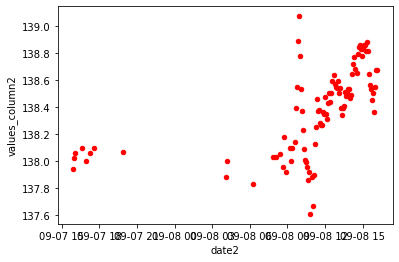

In [111]:
# HERE WITH tuples_df ITERATE THRU ROWS TO plot graph
chart = st.line_chart(tuples_df4)

C:\Users\charl\anaconda3\lib\site-packages\streamlit\elements\arrow_altair.py:91: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  chart = _generate_chart(ChartType.LINE, data, width, height)


In [14]:
# progress_bar = st.sidebar.progress(0)
# status_text = st.sidebar.empty()
# last_rows = np.random.randn(1, 1)
# chart = st.line_chart(last_rows)

# for i in range(1, 101):
#     new_rows = last_rows[-1, :] + np.random.randn(5, 1).cumsum(axis=0)
# #     print(status_text.text("%i%% Complete" % i))
#     print(i)
#     chart.add_rows(new_rows)
# #     progress_bar.progress(i)
#     last_rows = new_rows
# #     time.sleep(0.05)

# progress_bar.empty()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
